- sampling distributions?
- Standard Error
- Confidence intervals

In [71]:
sat.dat<-read.csv("https://vincentarelbundock.github.io/Rdatasets/csv/psych/sat.act.csv")

sat.dat$gender<-as.factor(sat.dat$gender)
sat.dat$education<-as.factor(sat.dat$education)

# Sample distributions

In [183]:
#ames <- read.csv("https://dyurovsky.github.io/85309/data/lab4/ames.csv")
#ames

`sample`

This is an R built-in function that allows you to get samples from a given vector of values. For example, let's take a sample of 100 observations from the ACT results data

In [194]:
sample(sat.dat$ACT, size=100)

[1] 32 34 30 28 35 30 30 32 22 36 26 33 29 21 29 21 20 25 23 19 35 36 23 33 28
 [26] 27 35 35 32 36 34 26 24 28 32 29 34 31 35 23 30 32 36 21 34 32 33 23 36 16
 [51] 21 28 33 31 35 26 30 28 28 35 25 35 27 28 20 31 32 33 32 30 26 18 35 36 27
 [76] 33 30 32 35 34 15 30 23 30 34 28 33 22 22 26 28 29 25 29 35 29 20 28 27 29

This, however, is restricted to one vectors, but how can we sample a data frame?

In [184]:
library(tidyverse)
sample_n(sat.dat, size=10)

X,gender,education,age,ACT,SATV,SATQ
30660,1,5,30,25,600,500
36524,2,3,44,25,600,600
38085,1,3,20,20,400,400
39242,2,3,21,27,610,NA
35077,2,2,25,26,500,580
34225,2,5,25,23,480,450
35345,2,5,28,29,410,760
35848,1,1,18,33,720,710
30136,1,5,53,36,560,740
30705,2,5,32,33,650,700


In [188]:
sat.dat %>% sample_n(size=10)

X,gender,education,age,ACT,SATV,SATQ
31294,2,5,28,23,500,NA
39951,2,3,24,31,700,630
31204,2,3,19,29,570,560
38895,2,3,20,35,720,780
30981,2,3,20,23,520,550
38227,2,3,18,33,700,680
32388,2,5,33,32,640,630
39937,1,4,40,27,613,630
30412,2,4,31,31,560,680
36924,2,4,25,32,630,730


# Confidence Intervals

In [80]:
library(lsr)

In [44]:
guassian.sample<-rnorm(100, mean = 100, sd=15)

In [45]:
z.alpha052<-qnorm(c(0.025, 0.975))

In [67]:
mean(guassian.sample) + z.alpha052[1]*15/sqrt(length(guassian.sample))
mean(guassian.sample) +  z.alpha052[2]*15/sqrt(length(guassian.sample))

[1] 95.52464

[1] 101.4045

In [65]:
ciMean(guassian.sample)

,2.5%,97.5%
guassian.sample,95.44053,101.4886


**Question:** Why are they different? (You'll see this in the assigments!)

In [53]:
t.alpha052<-qt(c(0.025, 0.975), df = 100-1)

In [54]:
mean(guassian.sample) + t.alpha052[1]*sd(guassian.sample)/sqrt(length(guassian.sample))
mean(guassian.sample) +  t.alpha052[2]*sd(guassian.sample)/sqrt(length(guassian.sample))

[1] 95.44053

[1] 101.4886

## Plotting confidence intervals

We are going to see now how to plot confidence intervals using `ggplot`. This `geom_errorbar` 

In [113]:
library(ggplot2)
library(psych)
library(Rmisc)

ERROR: Error in library(Rmisc): there is no package called ‘Rmisc’


In [2]:
library(Rmisc)

Loading required package: lattice

Loading required package: plyr



In [119]:
act.summary<-summarySE(sat.dat, groupvars = "education", measurevar = "ACT")
act.summary

education,N,ACT,sd,se,ci
0,57,27.47368,5.206813,0.6896592,1.3815535
1,45,27.48889,6.055134,0.9026461,1.8191636
2,44,26.97727,5.808929,0.8757290,1.7660759
3,275,28.29455,4.846227,0.2922385,0.5753181
4,138,29.26087,4.345153,0.3698840,0.7314202
5,141,29.60284,3.954887,0.3330616,0.6584807


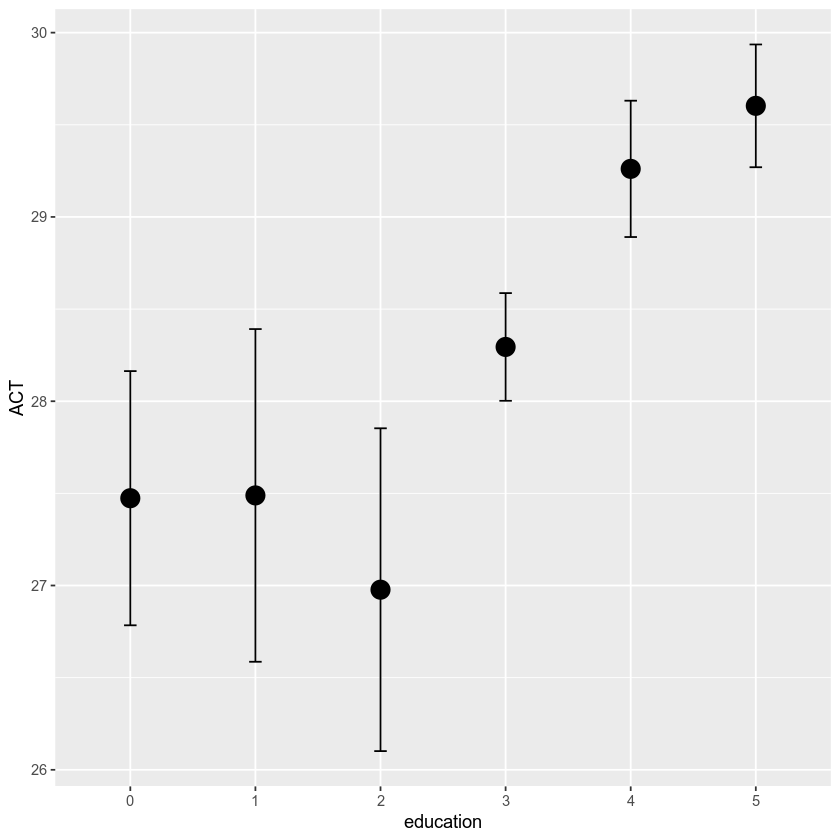

In [176]:
#act.mean<-sapply(describeBy(sat.dat$ACT, group = sat.dat$education), function(x) x[,"mean"])
#act.se<-sapply(describeBy(sat.dat$ACT, group = sat.dat$education), function(x) x[,"se"])

ggplot(data = act.summary, aes(x=education, y=ACT)) + 
geom_errorbar(aes(ymin=ACT-se, ymax=ACT+se), width=.1) + 
geom_point(size=5)

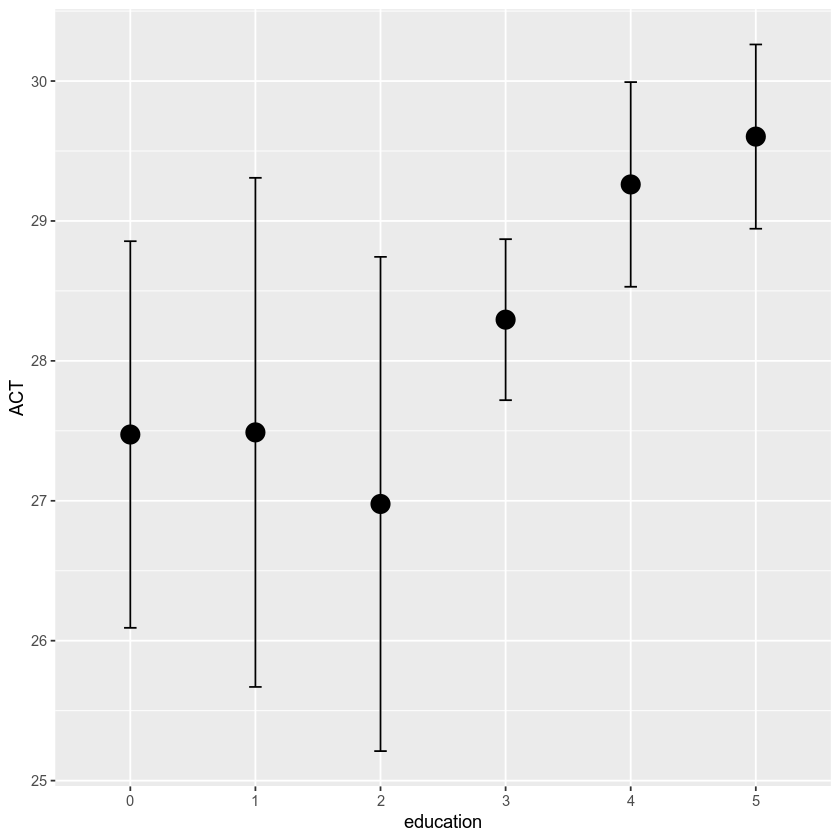

In [177]:
ggplot(data = act.summary, aes(x=education, y=ACT)) + 
geom_errorbar(aes(ymin=ACT-ci, ymax=ACT+ci), width=.1) + 
geom_point(size=5)

## Assigment: barplots!
## Assigment: Use above data to plot confidence intervals with respect to education 0. Así, pueden ver cuál es significativo o no...

Por ejemplo, cread un dataframe con las medidas ACT, SATV y SATQ de los puntos de education > 0, al que se le substrae la media de cada uno 

In [151]:
mean.act.0<-summarySE(sat.dat, groupvars = "education", measurevar = c("ACT"))[1, "ACT"]

In [161]:
sat.act.nozero <- sat.act[sat.act$education>0, c("gender", "education", "ACT")]
sat.act.nozero$ACTminusACT0 <- sat.act.nozero$ACT - mean.act.0

head(sat.act.nozero)

,gender,education,ACT,ACTminusACT0
29442,2,3,24,-3.4736842
29457,2,3,35,7.5263158
29498,2,3,21,-6.4736842
29503,1,4,26,-1.4736842
29504,1,2,31,3.5263158
29518,1,5,28,0.5263158


In [163]:
    act.nonzero.summary<-summarySE(sat.act.nozero, groupvars = "education", measurevar = "ACTminusACT0")
act.nonzero.summary

education,N,ACTminusACT0,sd,se,ci
1,45,0.01520468,6.055134,0.9026461,1.8191636
2,44,-0.49641148,5.808929,0.8757290,1.7660759
3,275,0.82086124,4.846227,0.2922385,0.5753181
4,138,1.78718535,4.345153,0.3698840,0.7314202
5,141,2.12915267,3.954887,0.3330616,0.6584807


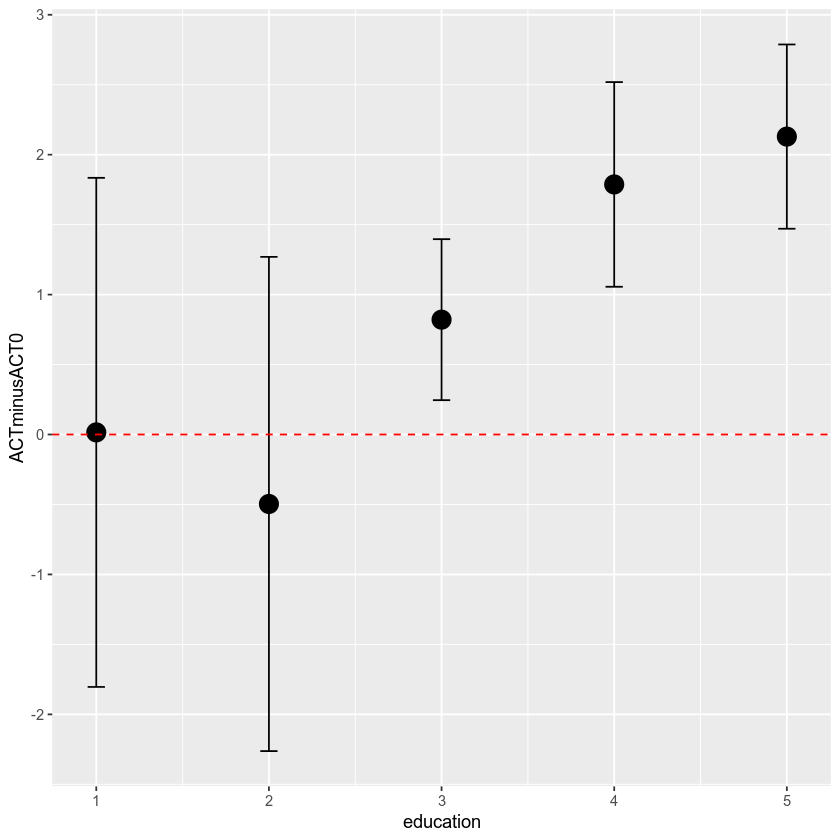

In [173]:
ggplot(data = act.nonzero.summary, aes(x=education, y=ACTminusACT0)) + 
geom_errorbar(aes(ymin=ACTminusACT0-ci, ymax=ACTminusACT0+ci), width=.1) + 
geom_point(size=5) + 
geom_hline(yintercept=0, color="red", linetype="dashed")

<div class="alert alert-info"> <b>Demonstration</b>: As the sample size increases, the sample mean tends to the population mean.

Let's demonstrate this for a population whose weight follows a gaussian distribution with mean=70kg and standard deviation=10. 
    
Consider the following sequence of samples sizes: (5, 10, 50, 100, 200, 500, 1000, 5000, 10000, 100000). For each of these sample sizes, generate a random sample and take the mean. Plot these against the sample sizes.
</div>

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate

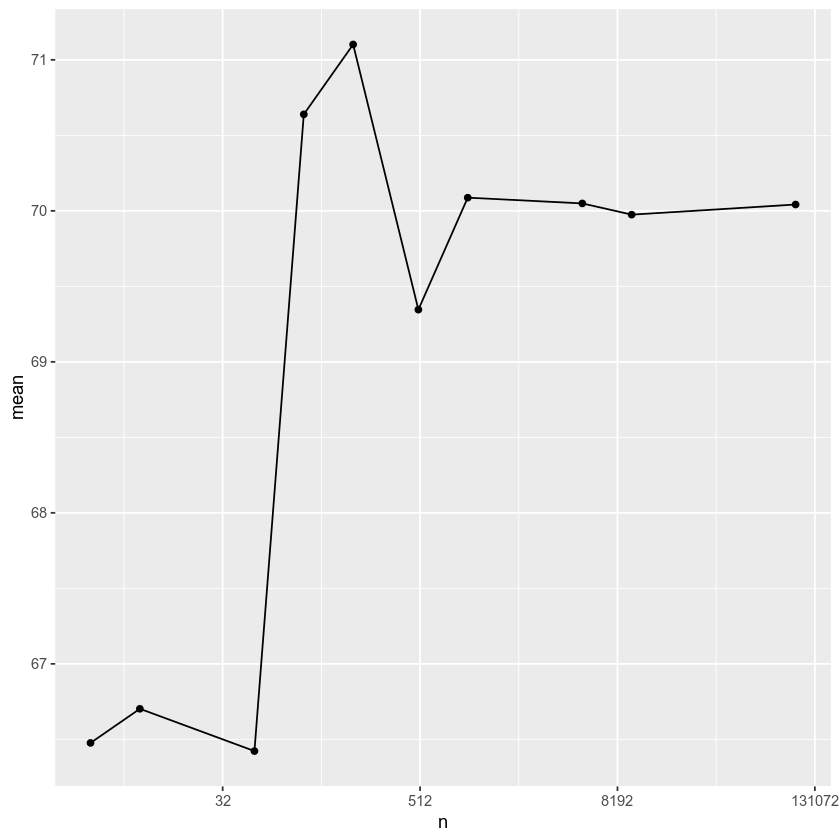

In [6]:
library(tidyverse)
sample.sizes<-c(5, 10, 50, 100, 200, 500, 1000, 5000, 10000, 100000)
set.seed(1234)
dat<-data.frame(n=sample.sizes, 
                mean=sapply(sample.sizes, function(x) mean(rnorm(x, mean = 70, sd = 10))))
ggplot(dat, aes(x=n, y=mean)) + geom_point() + geom_line() +  scale_x_continuous(trans='log2')       

<div class="alert alert-info"> <b>Demonstration</b>: The estimation of the standard deviation population is N-1 instead of N.
    
To demonstrate this, generate 10,000 simulated data sets with 1 observation each, 10,000 more with 2 observations, and so on up to a sample size of 10. Each data set consisted of fake IQ data: that is, the data were normally distributed with a true population mean of 100 and standard deviation 15. On average, the sample means should turn out to be 100, regardless of sample size.  However, the sample standard deviations should turn out to be systematically too small, especially for small sample sizes (Define a the standard deviation formula that divide by N and not N-1, that is, do not use the built-in R function `sd`.
</div>

In [50]:
sd.N<-function(x){
    N<-length(x)
    mu<-mean(x)
    return(sqrt(mean((mu-x)**2)))
}
sample.sizes<-c(2:10)

set.seed(1234)
means<-c()
sdsN<-c()
sds<-c()

for(n in sample.sizes){
    datasets<-lapply(c(1:10000), function(x) rnorm(n, mean = 100, sd=15))
    means<-c(means, mean(sapply(datasets, mean)))
    sdsN<-c(sdsN, mean(sapply(datasets, sd.N)))
    sds<-c(sds, mean(sapply(datasets, sd)))
             
}

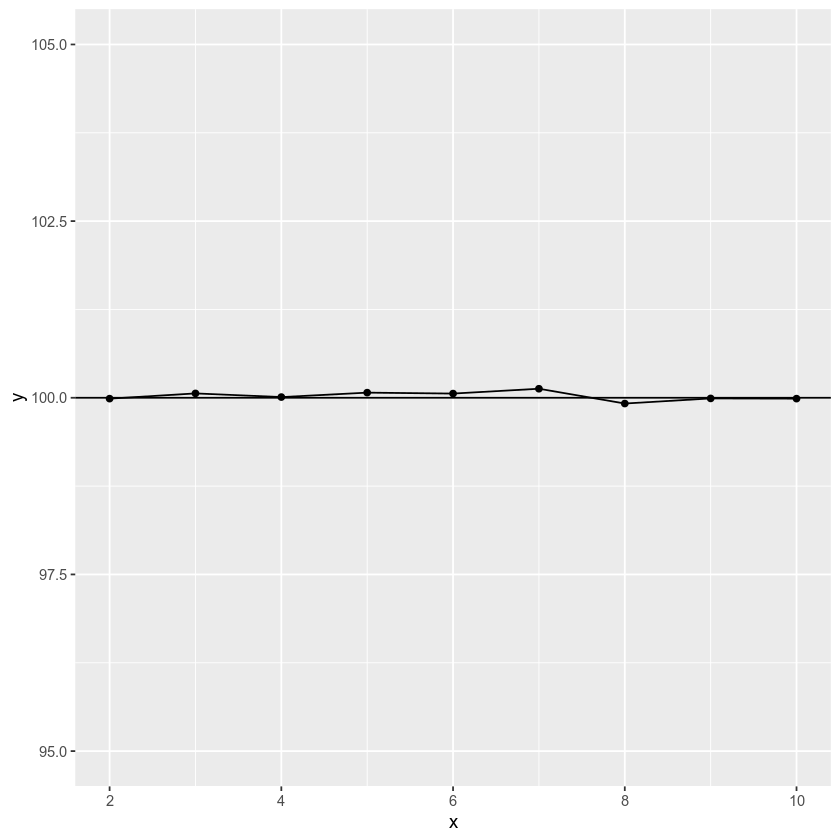

In [51]:
ggplot(data = data.frame(x=sample.sizes, y=means), aes(x=x, y=y)) + 
geom_point() + 
geom_line() + 
geom_hline(yintercept = 100) + ylim(95, 105)

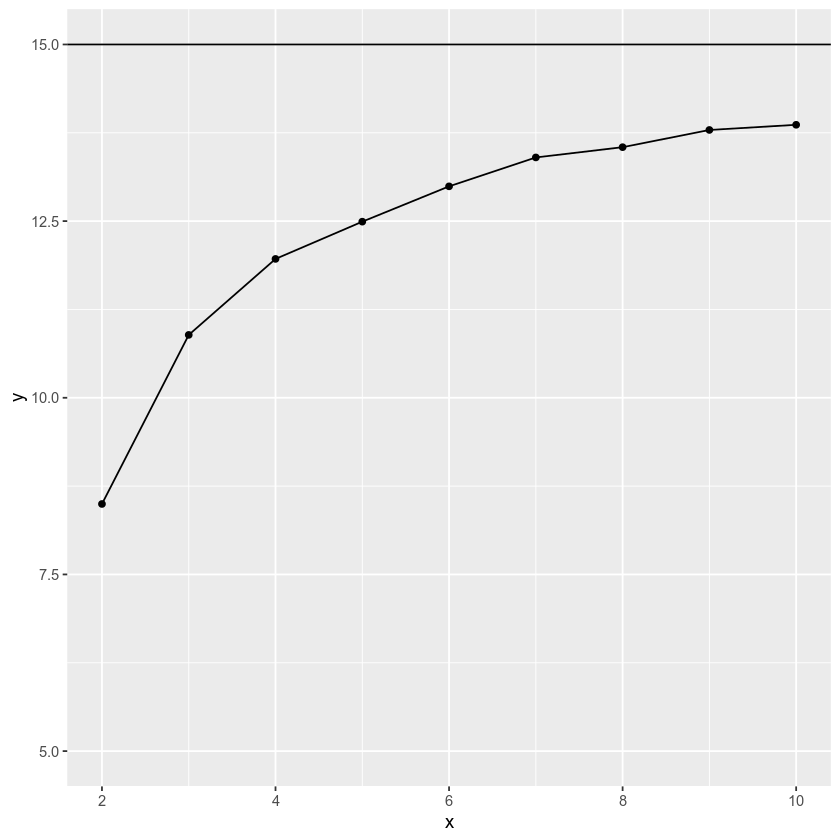

In [52]:
ggplot(data = data.frame(x=sample.sizes, y=sdsN), aes(x=x, y=y)) + 
geom_point() + 
geom_line() + 
geom_hline(yintercept = 15) + ylim(5, 15)

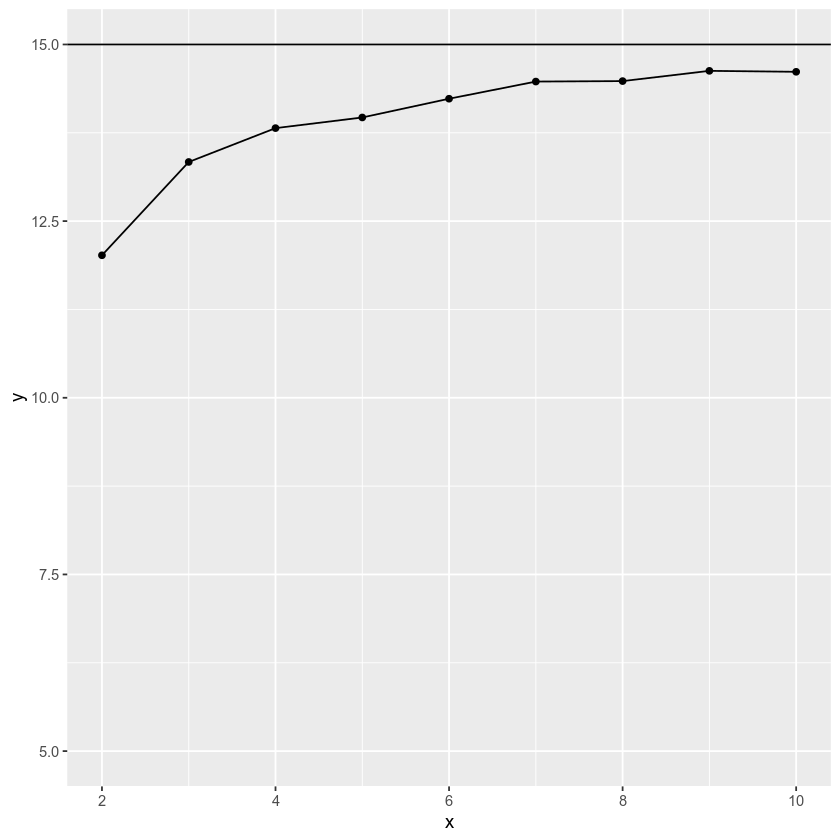

In [53]:
ggplot(data = data.frame(x=sample.sizes, y=sds), aes(x=x, y=y)) + 
geom_point() + 
geom_line() + 
geom_hline(yintercept = 15) + ylim(5, 15)

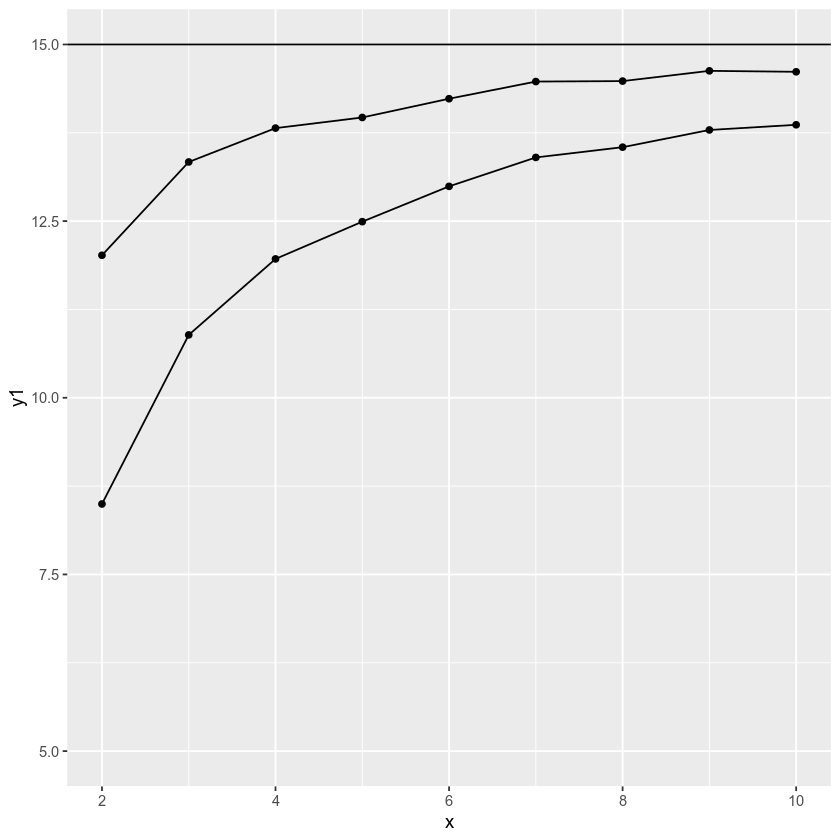

In [54]:
ggplot(data = data.frame(x=sample.sizes, y1=sdsN, y2=sds)) + 
geom_point(aes(x=x, y=y1)) + 
geom_line(aes(x=x, y=y1)) +
geom_point(aes(x=x, y=y2)) + 
geom_line(aes(x=x, y=y2)) +
geom_hline(yintercept = 15) + ylim(5, 15)